___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6) # figsize kullanmadan hepsini (10,6) olacak şekilde sabitledik.
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("final_scout_dummy.csv")
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,...,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,...,0,0,1,0,1,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,...,0,0,1,0,1,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,...,0,0,1,0,1,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,...,0,0,1,0,1,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,...,0,0,1,0,1,0,0,0,1,0


In [3]:
df.head().T

,0,1,2,3,4
price,15770.0,14500.0,14640.0,14500.0,16790.0
km,56013.0,80000.0,83450.0,73000.0,16200.0
Gears,7.0,7.0,7.0,6.0,7.0
age,3.0,2.0,3.0,3.0,3.0
Previous_Owners,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
Gearing_Type_Manual,0.0,0.0,0.0,0.0,0.0
Gearing_Type_Semi-automatic,0.0,0.0,0.0,0.0,0.0
Drive_chain_4WD,0.0,0.0,0.0,0.0,0.0
Drive_chain_front,1.0,1.0,1.0,1.0,1.0


In [4]:
df.iloc[:5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Columns: 143 entries, price to Drive_chain_rear
dtypes: float64(8), int64(135)
memory usage: 5.7 KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Columns: 143 entries, price to Drive_chain_rear
dtypes: float64(8), int64(135)
memory usage: 17.4 MB


In [6]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,...,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,...,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32089.995708,5.937355,1.389695,1.042853,88.499340,0.247063,1428.661891,1337.700534,4.832124,...,0.002011,0.040025,0.768709,0.231291,0.458498,0.512033,0.029469,0.012818,0.986931,0.000251
std,7381.679318,36977.214964,0.704772,1.121306,0.339178,26.674341,0.431317,275.804272,199.682385,0.867530,...,0.044797,0.196024,0.421671,0.421671,0.498290,0.499871,0.169123,0.112493,0.113576,0.015852
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12850.000000,1920.500000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16900.000000,20413.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.corr()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,...,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
price,1.000000,-0.399291,0.530291,-0.473478,-0.144628,0.696411,0.008180,0.281824,0.468433,0.272261,...,-0.049888,-0.035390,-0.386556,0.386556,0.391283,-0.431675,0.123043,0.158032,-0.155718,-0.005782
km,-0.399291,1.000000,-0.033171,0.758306,0.157041,0.004217,-0.049443,0.306774,0.147098,-0.300198,...,0.010414,-0.029852,-0.034449,0.034449,-0.108580,0.095489,0.037676,-0.010118,0.009749,0.001953
Gears,0.530291,-0.033171,1.000000,-0.064524,-0.036612,0.449793,-0.011096,0.339507,0.333928,-0.003733,...,-0.049749,-0.029608,-0.226584,0.226584,0.577080,-0.617596,0.125146,0.101277,-0.099723,-0.004215
age,-0.473478,0.758306,-0.064524,1.000000,0.316108,-0.083254,-0.045511,0.215266,0.064883,-0.341303,...,0.048200,-0.046952,-0.012297,0.012297,-0.094875,0.066074,0.084242,-0.059031,0.057757,0.005095
Previous_Owners,-0.144628,0.157041,-0.036612,0.316108,1.000000,-0.022556,0.019545,0.027958,0.003443,-0.020172,...,0.097720,-0.025799,-0.008901,0.008901,0.031344,-0.027503,-0.011062,-0.068745,0.068369,-0.002003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gearing_Type_Manual,-0.431675,0.095489,-0.617596,0.066074,-0.027503,-0.395527,-0.037980,-0.230192,-0.206747,-0.233030,...,0.038206,0.040295,0.262878,-0.262878,-0.942589,1.000000,-0.178497,-0.060852,0.059218,0.007548
Gearing_Type_Semi-automatic,0.123043,0.037676,0.125146,0.084242,-0.011062,0.089618,-0.080865,0.096286,0.013266,-0.061445,...,0.000473,-0.035581,-0.071834,0.071834,-0.160342,-0.178497,1.000000,0.013173,-0.012662,-0.002763
Drive_chain_4WD,0.158032,-0.010118,0.101277,-0.059031,-0.068745,0.192034,-0.009585,0.168260,0.093409,0.134088,...,-0.005115,0.085018,-0.120306,0.120306,0.056574,-0.060852,0.013173,1.000000,-0.990212,-0.001807
Drive_chain_front,-0.155718,0.009749,-0.099723,0.057757,0.068369,-0.191261,0.009478,-0.168458,-0.094112,-0.133620,...,0.005165,-0.083755,0.119257,-0.119257,-0.055108,0.059218,-0.012662,-0.990212,1.000000,-0.137783


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [8]:
y = df.price
X = df.drop("price", axis=1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([25371.76563415, 18899.18500525, 12429.01970329, ...,
       15622.72659933, 22027.10654864, 18208.35973271])

In [12]:
model.coef_

array([-3.57799899e-02,  6.28960841e+02, -1.62648163e+03,  8.99108472e+01,
        9.34669011e+01, -2.52268830e+02, -6.97421199e-01, -1.41670577e+00,
        1.30185942e+02,  2.47630935e+02, -6.31217320e+02,  3.07349586e+01,
        2.27980871e+02, -2.54797237e+02,  2.40390227e+02, -1.22602516e+03,
       -4.16499077e+01,  4.96039770e+01,  1.05468281e+02,  3.81694227e+02,
        2.44968701e+03,  3.10297781e+02,  1.43000383e+02,  1.16665734e+02,
       -5.16800333e+02,  1.67217777e+02,  1.28492743e+02, -3.97449486e+02,
        4.29295818e+02,  1.58612879e+02,  3.16331241e+02, -1.79850182e+02,
        7.04747998e+02, -1.77561609e+01,  9.83243060e+02,  3.28444341e+02,
       -5.62946905e+02,  5.16486607e+01, -2.69733790e+02,  2.48289443e+01,
        9.13532883e+02, -2.01933356e+02,  7.14732096e+00,  5.55411400e+02,
        6.50956273e+01, -1.13962335e+03, -2.49909385e+02, -4.64563006e+02,
        8.55763209e+01,  8.00078612e+02, -7.98443794e+01,  3.10643381e+01,
       -5.82050116e+00,  

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [14]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [15]:
from sklearn.model_selection import cross_validate, cross_val_score

In [16]:
model = LinearRegression()

scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [17]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.061769,0.005979,0.891659,-1695.161487,-5.380745e+06,-2319.643270
2,0.056809,0.003987,0.880459,-1792.105460,-7.034688e+06,-2652.298705
3,0.055815,0.004984,0.896718,-1686.344514,-5.615709e+06,-2369.748705
4,0.053820,0.003987,0.871376,-1762.794075,-6.607365e+06,-2570.479504
5,0.047840,0.003987,0.882673,-1714.733535,-6.194759e+06,-2488.927366
6,0.052822,0.006975,0.892986,-1630.620018,-5.066175e+06,-2250.816583
7,0.050831,0.003987,0.884653,-1755.550438,-7.029012e+06,-2651.228417
8,0.049835,0.004983,0.891399,-1811.383715,-6.900400e+06,-2626.861259
9,0.060798,0.004985,0.890162,-1727.005584,-6.274461e+06,-2504.887489
10,0.045847,0.003987,0.885395,-1633.841738,-5.573243e+06,-2360.771725


In [18]:
scores = pd.DataFrame(scores, index = range(1, 11))
for i in scores.columns:
    print(i, ": ", scores[i].mean())

fit_time :  0.053618645668029784
score_time :  0.004784059524536133
test_r2 :  0.8867479392183725
test_neg_mean_absolute_error :  -1720.9540563375558
test_neg_mean_squared_error :  -6167655.851098821
test_neg_root_mean_squared_error :  -2479.5663022535605


In [19]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8853655455758314
MAE 		: 1753.7165475819768
MSE 		: 6236571.376133306
RMSE 		: 2497.3128310512693


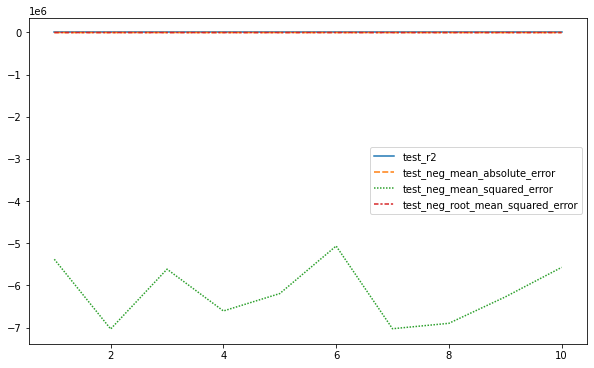

In [20]:
sns.lineplot(data = scores.iloc[:,2:]);

In [21]:
from sklearn.linear_model import Ridge

In [22]:
ridge_model = Ridge(alpha=1)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

In [23]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8854449102678985
MAE 		: 1753.6825007555658
MSE 		: 6232253.620452366
RMSE 		: 2496.448201035296


In [24]:
y_train_pred = ridge_model.predict(X_train)

eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.891674805525177
MAE 		: 1691.401529927036
MSE 		: 5905973.219909132
RMSE 		: 2430.2208171088346


In [25]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,2.430221e+03,2.496448e+03
mae,1.691402e+03,1.753683e+03
mse,5.905973e+06,6.232254e+06
R2,8.916748e-01,8.854449e-01


In [26]:
from sklearn.linear_model import RidgeCV

In [27]:
alpha_space = np.linspace(0.01, 1, 100)

In [28]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [29]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [30]:
eval_metrics(y_test, y_pred)


Model testing performance:
--------------------------
R2_score 	: 0.8854449102678985
MAE 		: 1753.6825007555658
MSE 		: 6232253.620452366
RMSE 		: 2496.448201035296


In [31]:
dict_ridge = {"mae" : mean_absolute_error(y_test, y_pred),
"mse" : mean_squared_error(y_test, y_pred),
"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
"R2_score" : r2_score(y_test, y_pred)}

In [32]:
dict_ridge

{'mae': 1753.6825007555658,
 'mse': 6232253.620452366,
 'rmse': 2496.448201035296,
 'R2_score': 0.8854449102678985}

In [33]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.891674805525177
MAE 		: 1691.401529927036
MSE 		: 5905973.219909132
RMSE 		: 2430.2208171088346


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [34]:
from sklearn.linear_model import Lasso, LassoCV

lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

y_train_pred = lasso_model.predict(X_train)

In [35]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8913828656503525
MAE 		: 1692.539215032402
MSE 		: 5921890.007235441
RMSE 		: 2433.49337521914


In [36]:
y_pred = lasso_model.predict(X_test)

eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8853061184632274
MAE 		: 1753.8786033850968
MSE 		: 6239804.4479989465
RMSE 		: 2497.960057326567


In [37]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000) 

lasso_cv_model.fit(X_train, y_train)
lasso_cv_model.alpha_

1.0

In [38]:
dict_lasso = {"mae" : mean_absolute_error(y_test, y_pred),
"mse" : mean_squared_error(y_test, y_pred),
"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
"R2_score" : r2_score(y_test, y_pred)}

In [39]:
dict_lasso

{'mae': 1753.8786033850968,
 'mse': 6239804.4479989465,
 'rmse': 2497.960057326567,
 'R2_score': 0.8853061184632274}

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [40]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [41]:
elastic_model.l1_ratio

0.5

In [42]:
elastic_model.alpha

1.0

In [43]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8072198888883049
MAE 		: 2343.9044757264164
MSE 		: 10510520.466422068
RMSE 		: 3241.99328599275


In [44]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8089102396639265
MAE 		: 2343.1407398791366
MSE 		: 10396044.850306984
RMSE 		: 3224.2898210779663


In [45]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [46]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [47]:
dict_elastic = {"mae" : mean_absolute_error(y_test, y_pred),
"mse" : mean_squared_error(y_test, y_pred),
"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
"R2_score" : r2_score(y_test, y_pred)}

In [48]:
dict_elastic

{'mae': 2343.1407398791366,
 'mse': 10396044.850306984,
 'rmse': 3224.2898210779663,
 'R2_score': 0.8089102396639265}

### Grid Search

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
elastic_model = ElasticNet(max_iter=10000)

In [51]:
param_grid ={"alpha":[0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [52]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [53]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.4s
[CV] END ...........................alpha=0.01

KeyboardInterrupt: 

In [ ]:
grid_model.best_params_

In [ ]:
pd.DataFrame(grid_model.cv_results_)

In [ ]:
y_pred = grid_model.predict(X_test)

In [ ]:
eval_metrics(y_test, y_pred)

## 7. Visually Compare Models Performance In a Graph

In [80]:
df1 = pd.DataFrame.from_dict(data = [dict_ridge, dict_lasso, dict_elastic])

df1 = df1
df1

,mae,mse,rmse,R2_score
0,1753.682501,6.232254e+06,2496.448201,0.885445
1,1753.878603,6.239804e+06,2497.960057,0.885306
2,2343.140740,1.039604e+07,3224.289821,0.808910


In [91]:
df1["mae"].values

array([1753.68250076, 1753.87860339, 2343.14073988])

Text(0.5, 1.0, ' rmse dif')

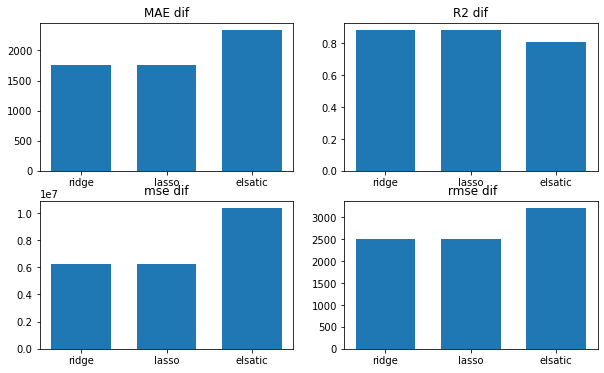

In [108]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].bar([1, 2,3], df1["mae"].values, width=0.7,
       tick_label=['ridge', 'lasso', 'elsatic'], align='center')
axs[0, 0].set_title('MAE dif')
axs[0, 1].bar([1, 2,3], df1["R2_score"].values, width=0.7,
       tick_label=['ridge', 'lasso', 'elsatic'], align='center')
axs[0, 1].set_title('R2 dif')
axs[1, 0].bar([1, 2,3], df1["mse"].values, width=0.7,
       tick_label=['ridge', 'lasso', 'elsatic'], align='center')
axs[1, 0].set_title('mse dif')
axs[1, 1].bar([1, 2,3], df1["rmse"].values, width=0.7,
       tick_label=['ridge', 'lasso', 'elsatic'], align='center')
axs[1, 1].set_title(' rmse dif')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [68]:
df1.iloc[0]

0    1753.682501
1    1753.878603
2    2343.140740
Name: mae, dtype: float64